## PIMA INDIAN DIABETES DATASET

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
pi = pd.read_csv('pima_indian_data.csv')

###  ♧ Normal Description of the Dataset ♧

In [55]:
pi.head()

,Number of times pregnant,Plasma glucose,Diastolic blood pressure,Triceps skinfold thickness,serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [86]:
pi.shape

(768, 9)

In [87]:
# Get the column names 
p = pi.columns
p

Index(['Number  of times pregnant', 'Plasma glucose',
       'Diastolic blood pressure', 'Triceps skinfold thickness',
       'serum insulin', 'Body mass index', 'Diabetes pedigree function', 'Age',
       'Class'],
      dtype='object')

In [56]:
pi.isna().sum().sum()

0

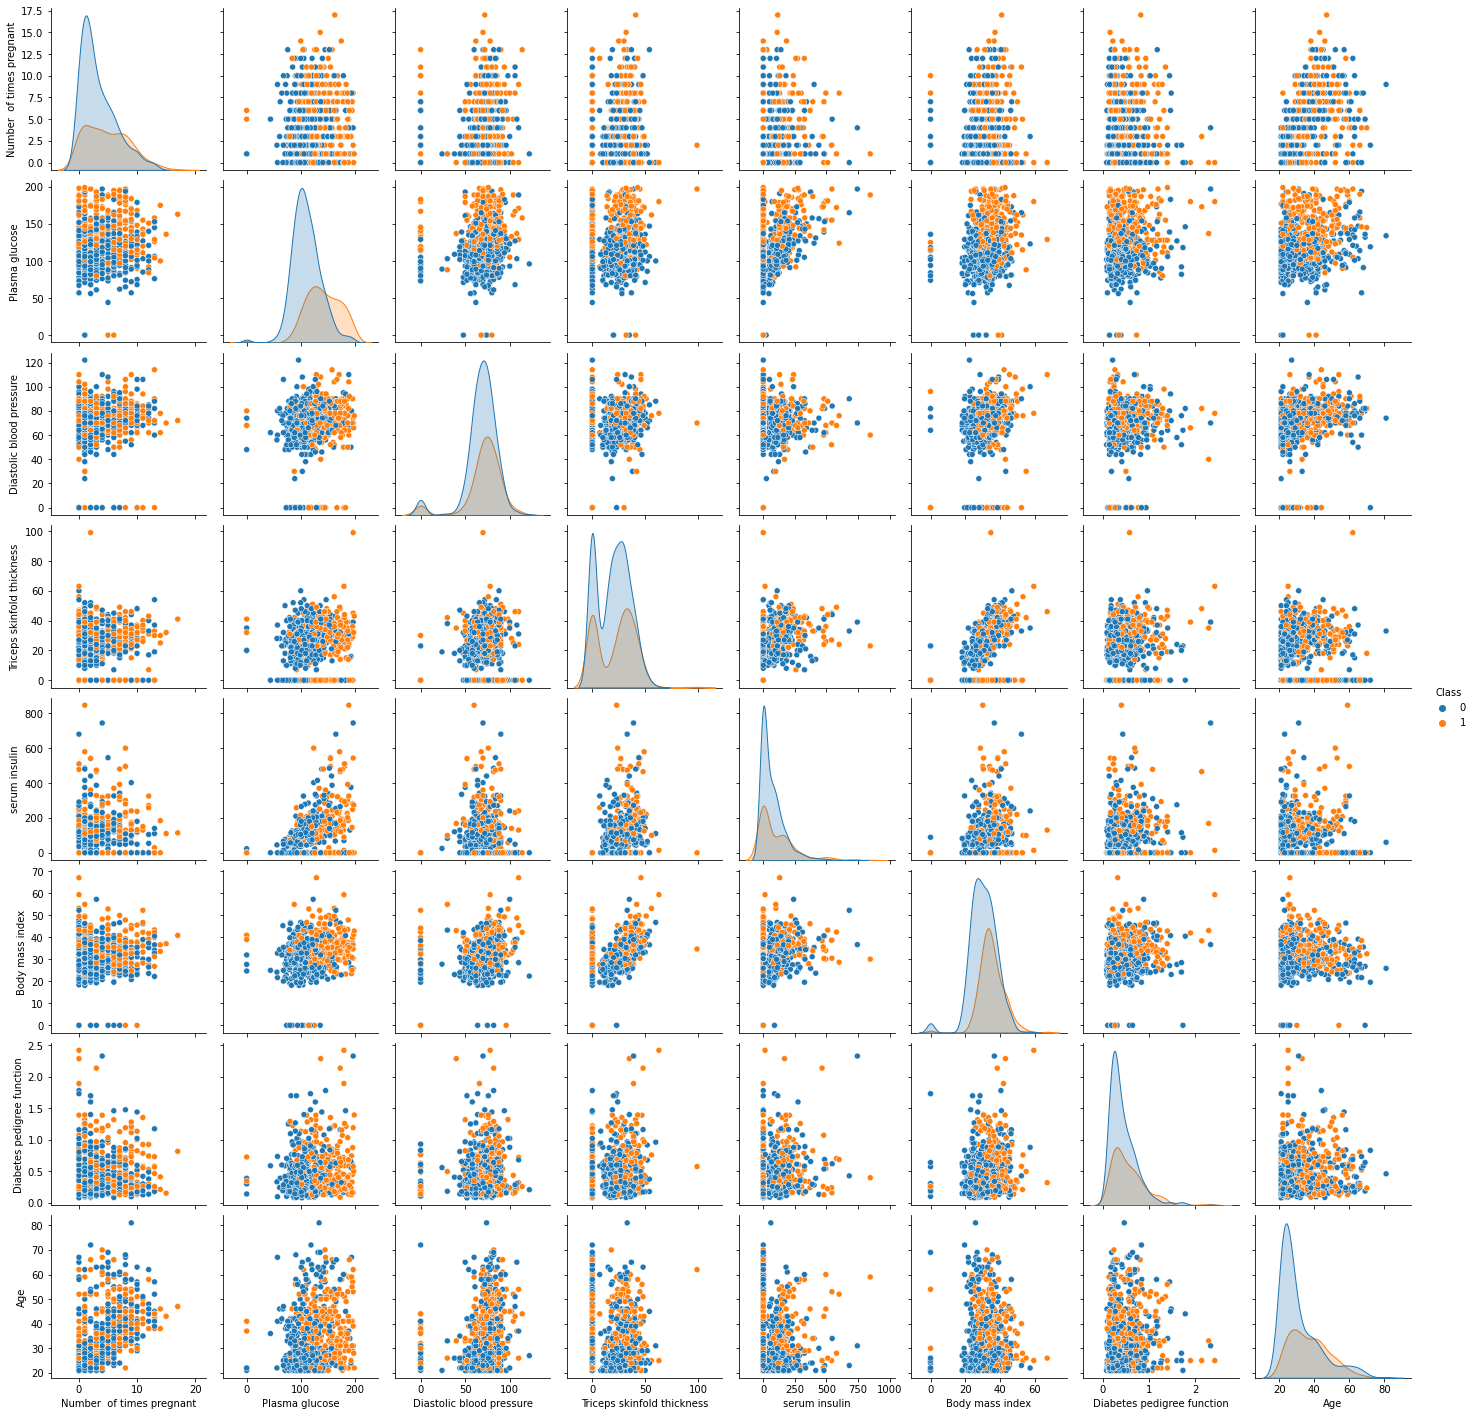

In [89]:
sns.pairplot(pi, hue='Class')

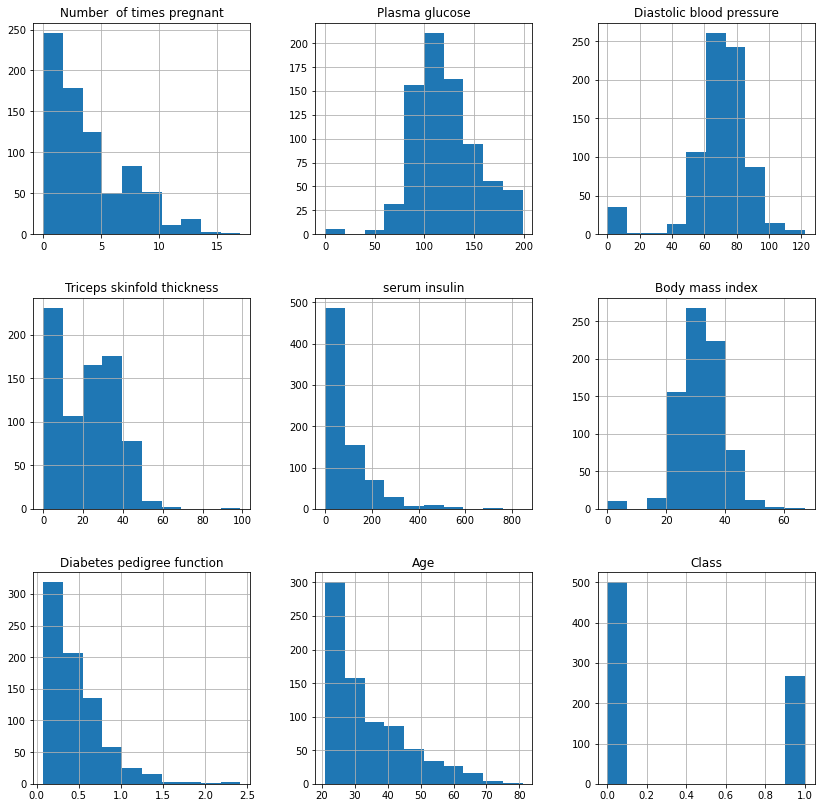

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

pi.hist(figsize=(14,14))
plt.show()

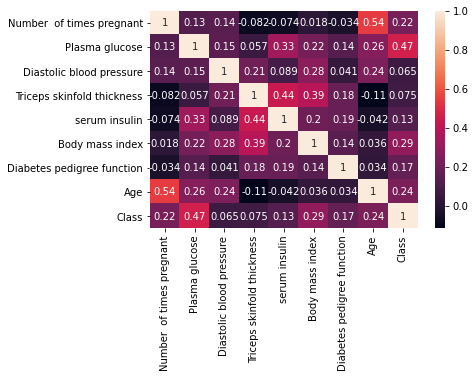

In [58]:
import seaborn as sns

sns.heatmap(pi.corr(),annot = True)
plt.show()

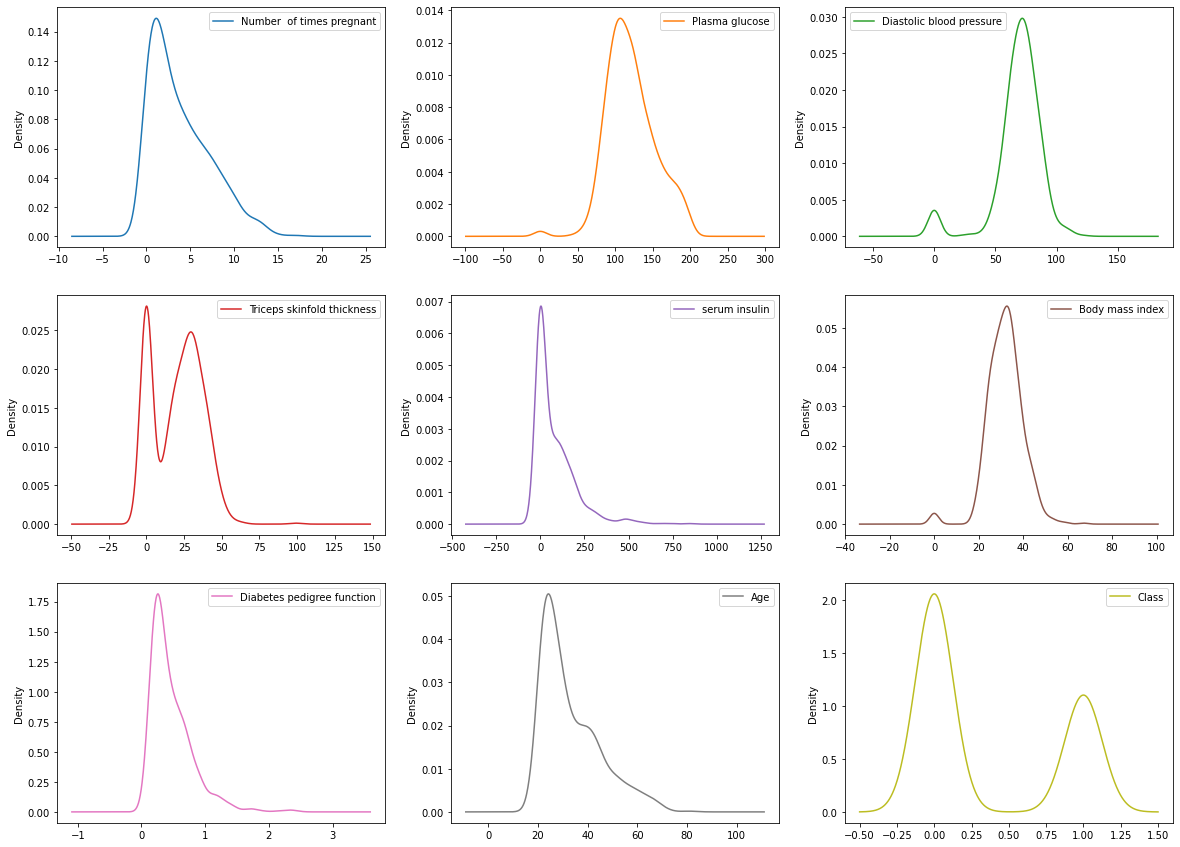

In [59]:
pi.plot(kind='density', subplots=True, layout=(3,3), figsize=(20, 15), sharex=False)
plt.show()

In [60]:
X=pi.iloc[:]
y=pi.iloc[:,8]

Splitting the Dataset by using train_test_split

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 614
Test samples: 154


Creating A Pipeline And Using The PCA Model

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(x, y, comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline.fit(x, y)

m = generate_estimates(X_train, y_train)
m

Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])

In [63]:
from sklearn.model_selection import train_test_split

def create_holdout_splits(X, y):
    x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = create_holdout_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Validation sample: {X_val.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 491
Validation sample: 123
Test sample: 154


Logistic Regression means predicting a catagorical variable, without losing too much information. For Example- Class 1 Or Class 0 

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('pca', PCA(n_components=comp)),
             ('model', LogisticRegression(penalty='none'))
            ]
        )
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression(penalty='none'))
            ]
        )

    return modeling_pipeline

m_rawFeatures = generate_estimates(use_pca=False).fit(X_train, y_train)
print(m_rawFeatures)

m_pca_models = {}
for i in range(1,6):
    m_pca_models[i] = generate_estimates(use_pca=True, comp=i).fit(X_train, y_train)
    print(m_pca_models[i])
    
print('Models fitted')

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=1)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=2)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=3)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=4)),
                ('model', LogisticRegression(penalty='none'))])
Pipeline(steps=[('scaling', StandardScaler()), ('pca', PCA(n_components=5)),
                ('model', LogisticRegression(penalty='none'))])
Models fitted


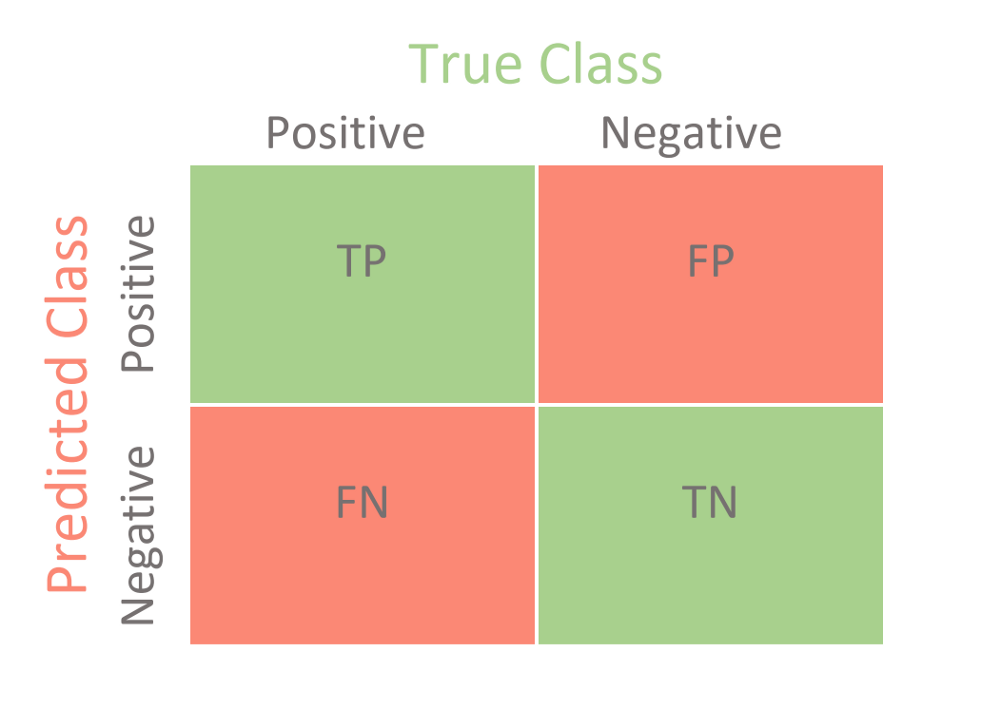

In [90]:
from sklearn.metrics import confusion_matrix

y_val_rawFeatures = m_rawFeatures.predict(X_val)

print('Using raw features:')
print(confusion_matrix(y_val, y_val_rawFeatures))

y_val_pca = {}
for i in range(1,6):
    y_val_pca[i] = m_pca_models[i].predict(X_val)
    print(f'Using PCA{i}:')
    print(confusion_matrix(y_val, y_val_pca[i]))

Using raw features:
[[80  0]
 [ 0 43]]
Using PCA1:
[[70 10]
 [13 30]]
Using PCA2:
[[73  7]
 [13 30]]
Using PCA3:
[[77  3]
 [11 32]]
Using PCA4:
[[79  1]
 [ 5 38]]
Using PCA5:
[[79  1]
 [ 5 38]]


Seeing the results and understanding the matrix,, I think the model has performed well.

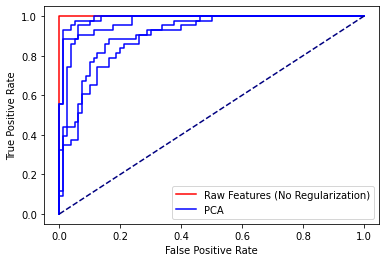

In [91]:
from sklearn.metrics import roc_curve

def generate_probs(X, model=m):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_val_rawFeatures, tpr_val_rawFeatures = generate_roc(y_val,
                                                        generate_probs(X_val, model=m_rawFeatures))


fpr_val_pca = {}
tpr_val_pca = {}
for i in range(1,6):
    fpr_val_pca[i], tpr_val_pca[i] = generate_roc(y_val,
                                          generate_probs(X_val, model=m_pca_models[i]))


plt.plot(fpr_val_rawFeatures, tpr_val_rawFeatures,'-r')
for i in range(1,6):
    plt.plot(fpr_val_pca[i], tpr_val_pca[i],'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Raw Features (No Regularization)','PCA'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Let's check for Test Data

Using PCA1:
[[97  5]
 [24 28]]


Using PCA2:
[[94  8]
 [23 29]]


Using PCA3:
[[97  5]
 [11 41]]


Using PCA4:
[[101   1]
 [  6  46]]


Using PCA5:
[[100   2]
 [  7  45]]




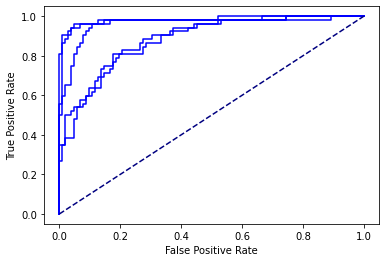

In [101]:
y_test_pca = {}
for i in range(1,6):
    y_test_pca[i] = m_pca_models[i].predict(X_test)
    print(f'Using PCA{i}:')
    print(confusion_matrix(y_test, y_test_pca[i]))
    print('\n')

# create false/true positive rate curves
fpr_test_pca = {}
tpr_test_pca = {}
for i in range(1,6):
    fpr_test_pca[i], tpr_test_pca[i] = generate_roc(y_test,
                                          generate_probs(X_test,
                                                         model=m_pca_models[i])
                                                 )

# plot the ROC curve
for i in range(1,6):
    plt.plot(fpr_test_pca[i], tpr_test_pca[i],'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Split the data into Train and test. Traing data to be divided into k folds(10)

In [65]:
from sklearn.model_selection import train_test_split

def create_splits(X, y):
    return train_test_split(X, y, test_size=0.20)

X_train, X_test, y_train, y_test = create_splits(X, y)

print(f'Training sample: {X_train.shape[0]:,}')
print(f'Test sample: {X_test.shape[0]:,}')

Training sample: 614
Test sample: 154


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(comp=5):
    
    modeling_pipeline = Pipeline([
        ('scaling', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('model', LogisticRegression(penalty='none'))
        ]
    )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

clf = generate_estimates()
cv_results = cross_validate(clf, X_train, y_train, 
                            scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=10)
cv_results

{'fit_time': array([0.00799465, 0.0079987 , 0.01601028, 0.01598978, 0.00799417,
        0.01599884, 0.00799561, 0.01598883, 0.00799561, 0.01598763]),
 'score_time': array([0.00799417, 0.00798988, 0.00797248, 0.00799465, 0.00799465,
        0.00798655, 0.00799489, 0.00799441, 0.00799394, 0.00802708]),
 'test_accuracy': array([1.        , 0.98387097, 0.93548387, 0.9516129 , 0.93442623,
        1.        , 0.93442623, 0.95081967, 0.98360656, 0.96721311]),
 'test_recall': array([1.        , 0.95454545, 0.86363636, 0.95454545, 0.95238095,
        1.        , 0.9047619 , 1.        , 0.95454545, 0.95454545]),
 'test_precision': array([1.        , 1.        , 0.95      , 0.91304348, 0.86956522,
        1.        , 0.9047619 , 0.875     , 1.        , 0.95454545]),
 'test_f1_macro': array([1.        , 0.98219925, 0.92799071, 0.94767932, 0.92890443,
        1.        , 0.92738095, 0.94718615, 0.98204298, 0.96445221]),
 'test_roc_auc': array([1.        , 0.99772727, 0.98977273, 0.97159091, 0.97261

In [67]:
for k in cv_results.keys():
    print(f'{k}: {cv_results[k].mean():.4f} (+/- {cv_results[k].std():.4f})')

fit_time: 0.0120 (+/- 0.0040)
score_time: 0.0080 (+/- 0.0000)
test_accuracy: 0.9641 (+/- 0.0250)
test_recall: 0.9539 (+/- 0.0412)
test_precision: 0.9467 (+/- 0.0504)
test_f1_macro: 0.9608 (+/- 0.0275)
test_roc_auc: 0.9899 (+/- 0.0112)


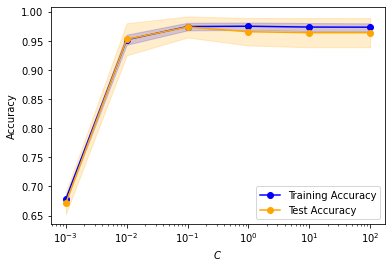

In [68]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2'))
        ]
    )

from sklearn.model_selection import validation_curve

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

training_scores, test_scores = validation_curve(estimator=lg_pipe, X=X_train, y=y_train,
                                               param_name='logreg__C', 
                                               param_range=param_range, cv=10)

train_mean = np.mean(training_scores, axis=1)
train_std = np.std(training_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', label='Training Accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.2, color='blue')

plt.plot(param_range, test_mean, color='orange', marker='o', label='Test Accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.2, color='orange')

plt.xscale('log')
plt.xlabel('$C$')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

This shows that the accuracy is almost the same for training and test.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

def generate_estimates(use_pca = False, comp=None):
    if use_pca:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('pca', PCA(n_components=5)),
             ('model', LogisticRegression(penalty='none'))
            ]
        )
    else:
        modeling_pipeline = Pipeline([
            ('scaling', StandardScaler()),
             ('model', LogisticRegression())
            ]
        )

    return modeling_pipeline

from sklearn.model_selection import cross_validate

pca_clf = generate_estimates(use_pca=True, comp=2)
nopca_clf = generate_estimates()

pca_cv_results = cross_validate(pca_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
pca_cv_results

{'fit_time': array([0.00799251, 0.00799513, 0.01598811, 0.00799394, 0.00799465]),
 'score_time': array([0.00799489, 0.00799417, 0.00799537, 0.00799465, 0.00799441]),
 'test_accuracy': array([0.99186992, 0.95934959, 0.97560976, 0.96747967, 0.97540984]),
 'test_recall': array([0.97674419, 0.95348837, 0.95348837, 0.97727273, 0.95348837]),
 'test_precision': array([1.        , 0.93181818, 0.97619048, 0.93478261, 0.97619048]),
 'test_f1_macro': array([0.99101206, 0.9555411 , 0.97303617, 0.96495726, 0.97291898]),
 'test_roc_auc': array([0.9997093 , 0.98546512, 0.98459302, 0.99712313, 0.98675302])}

In [70]:
nopca_cv_results = cross_validate(nopca_clf, X_train, y_train, scoring=['accuracy', 'recall', 'precision', 'f1_macro', 'roc_auc'], cv=5)
nopca_cv_results

{'fit_time': array([0.01598859, 0.00799417, 0.00799513, 0.00799513, 0.00799441]),
 'score_time': array([0.        , 0.00799465, 0.00799274, 0.00799489, 0.01470947]),
 'test_accuracy': array([1., 1., 1., 1., 1.]),
 'test_recall': array([1., 1., 1., 1., 1.]),
 'test_precision': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([1., 1., 1., 1., 1.]),
 'test_roc_auc': array([1., 1., 1., 1., 1.])}

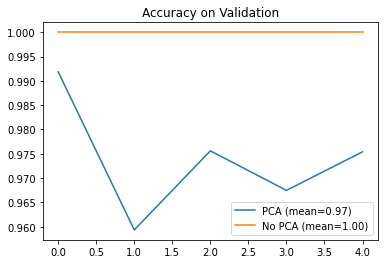

In [71]:
a1 = pca_cv_results['test_accuracy'].mean()
a2 = nopca_cv_results['test_accuracy'].mean()

plt.plot(pca_cv_results['test_accuracy'])
plt.plot(nopca_cv_results['test_accuracy'])
plt.legend([f'PCA (mean={a1:.2f})',f'No PCA (mean={a2:.2f})'])
plt.title('Accuracy on Validation')
plt.show()

Grid Search

In [72]:
from sklearn.model_selection import GridSearchCV

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

lg_pipe = modeling_pipeline = Pipeline([
        ('scaler', StandardScaler()),
         ('pca', PCA(n_components=5)),
         ('logreg', LogisticRegression(penalty='l2', solver='liblinear'))
        ]
    )

In [74]:
param_grid = [
  {'logreg__C': [1, 10, 100, 1000], 'pca__n_components': [1,2,3,4,5,10,15]}
 ]

In [75]:
gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='accuracy')
gcv_results = gcv_results.fit(X_train, y_train)

In [76]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [77]:
gcv_results.best_score_

0.9755831000932961

In [78]:
gcv_results.best_params_

{'logreg__C': 1, 'pca__n_components': 5}

In [79]:
gcv_results.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=5)),
                ('logreg', LogisticRegression(C=1, solver='liblinear'))])

In [80]:
gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='precision')
gcv_results = gcv_results.fit(X_train, y_train)

In [81]:
gcv_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_logreg__C', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [82]:
gcv_results.best_score_

0.9637963485789574

Since the precision is close to 1 we can say that every result retrieved was relevant.

In [83]:
gcv_results = GridSearchCV(estimator=lg_pipe, param_grid=param_grid, scoring='recall')
gcv_results = gcv_results.fit(X_train, y_train)

In [84]:
gcv_results.best_score_

0.9721987315010571

Let's check how it performs on the test data.

In [104]:
yp = gcv_results.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, yp))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.96      0.94      0.95        52

    accuracy                           0.97       154
   macro avg       0.97      0.96      0.96       154
weighted avg       0.97      0.97      0.97       154



## Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [96]:
print(f'Training accuracy: {tree_model.score(X_train, y_train):.2f}')
print(f'Test accuracy: {tree_model.score(X_test, y_test):.2f}')

Training accuracy: 1.00
Test accuracy: 1.00


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

tr_pipe = modeling_pipeline = Pipeline([
        ('dt', DecisionTreeClassifier())
        ]
    )

param_grid = [
  {'dt__max_depth': [3,4,5,6,7,8],
   'dt__min_samples_split': [2,4,6,8]
  }
 ]

s = GridSearchCV(estimator=tr_pipe, param_grid=param_grid, scoring='accuracy', refit=True)
s = s.fit(X_train, y_train)

s.best_params_


{'dt__max_depth': 3, 'dt__min_samples_split': 2}

In [99]:
s.best_score_

1.0

In [100]:
s.score(X_test, y_test)

1.0

### Reference
1) Prof.Christopher McGraw lecture week7. 

2) Scikit Learn
